In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1920,
        'height': 1080,
        'scroll': True,
})

{'width': 1920, 'height': 1080, 'scroll': True}

# Week 02 (Monday), AST 8581 / PHYS 8581 / CSCI 8581 / STAT 8581: Big Data in Astrophysics

### Michael Coughlin <cough052@umn.edu>, Jie Ding <dingj@umn.edu>


With contributions totally ripped off from Zjelko Ivezic and Mario Juric (UW), Gordon Richards (Drexel), Federica Bianco (U. Del), Maria Suveges (EPFL), Gautham Narayan (UIUC), Michael Steinbach (UMN), and Nico Adams (UMN)



# Where are we headed?

<b>Foundations of Data and Probability</b> -> Statistical frameworks (Frequentist vs Bayesian) -> Estimating underlying distributions -> Analysis of Time series (periodicity) -> Analysis of Time series (variability) -> Analysis of Time series (stochastic processes) -> Gaussian Processes -> Decision Trees / Regression -> Dimensionality Reduction -> Principle Component Analysis -> Clustering -> Density Estimation / Anomaly Detection -> Supervised Learning -> Deep Learning -> Introduction to Databases - SQL -> Introduction to Databases - NoSQL -> Introduction to Multiprocessing -> Introduction to GPUs -> Unit Testing

<center> <img src ="./figures/survey.png" width="600"> </center>

## WHAT ASTRONOMERS CAN MEASURE
* Angular separations
* Time differences
* Energy differences

###  That’s it.

## WHAT ASTRONOMERS CAN MEASURE
* Astrometry (angular position on the sky) - arcseconds
* Related definition: 1 parsec (pc) = distance at which a distance of 1 AU (i.e. Earth-Sun) subtends and angle of 1 arcsecond, i.e. 1 pc = 1 AU/tan(1”) ~ 31 trillion kilometers or 3.26 light years (ly)
* Photometry (how bright something is)
* Flux = photons (or energy in ergs)/sec/cm^2
* (Apparent) Magnitude = -2.5 log10(Flux) + const
* (Absolute) Magnitude = -2.5log10(Luminosity) + const = magnitude you’d measure if you could move the source to 10 pc
* Light curves = photometry vs time
* Evolution in source brightness either because of intrinsic (supernovae, AGN) or extrinsic (asteroids, eclipsing binaries)
* Spectroscopy = Energy vs wavelength/frequency
* Images/maps = Energy vs position on the sky (clustering, spatial correlation functions)
* Proper Motion = Astrometry vs time (e.g. stars, satellite galaxies, asteroids…)

<center> <img src ="./figures/spectrum.png" width="800"> </center>

<center> <img src ="./figures/images.png" width="800"> </center>

## Temporal & Spatial Variation

<center> <img src ="./figures/spatial_temporal.png" width="800"> </center>

## Spatial Variation

<center> <img src ="./figures/cmb.png" width="300"> <img src ="./figures/cmb_spectrum.png" width="600"> </center>

## Statistical inference is a logical framework with which to test our beliefs of a noisy world against data.
### We formalize our beliefs in a probabilistic model.

# AXIOMS OF PROBABILITY

## SOME KEY IDEAS
* All of the data we collect include some degree of randomness
* Any conclusions we draw must therefore incorporate some notion of uncertainty
* There is a correct answer - the Universe as we know it exists after all.
* Theory gives us a useful model for it. The challenging is evaluating how likely that model is given the data
* Data are constants.
* Even if they were randomly generated by the Universe, the data that we have already collected are fixed numbers.
* We describe things we don't know with perfect precision as "random"

## RANDOM VARIABLES

<center> <img src ="./figures/cartoon_probability.png" width="800"> </center>

<center> <img src ="./figures/random_variables.png" width="800"> </center>

## Random Variables

* Discrete:
   * Spectral type (G2V, KIII)
   * Galaxy type, galaxy zoo
* Continuous:
   * magnitude, flux, colour, radial velocity, parallax/distance, temperature, elemental abundances, magnetic field, age, etc...

# Statistical inference is a logical framework with which to test our beliefs of a noisy world against data.

## We formalize our beliefs in a probabilistic model.

## THE MULTIVARIATE CASE

<center> <img src ="./figures/2D.png" width="400"> </center>

<center> <img src ="./figures/marginal.png" width="600"> </center>

## Bayes

<center> <img src ="./figures/bayes.png" width="800"> </center>

* Posterior Likelihood: How probable is the hypothesis given the data we observed
* Prior: How probable was the hypothesis before we observed anything
* Likelihood: How probable is the data given the hypothesis is true
* Evidence: How probable is the data over all possible hypotheses

## IN CLASS EXERCISE
* Use the file: data/sdssj120650-20130310-total_mcmc.hdf5
   * Use h5py to look at this data - h5py.File() to open, and then use the keys() method to find what elements are store
   * You want “chain” and then “position”
* Use numpy to get the stored data as an array
* Use matplotlib to visualize this point cloud (CAREFUL)
* Use pandas to convert the first two columns of the numpy array to a dataframe
* Use seaborn’s jointplot to visualize this dataframe (try hex, or a kde with every 100th sample)

In [1]:
# we use the numpy scipy and friends stack so much that it's worth just having things in the namespace
# you can do that with %pylab here
# The things that start with % are called `magics`
# There's a lot of them, and you can see the list here: 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x7f8930db91b0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# HDF5 is a structured file format popular for large datasets
# originally developed here, at NCSA, it's the de facto standard
# for large binary datasets that have to be portable between
# different programming languages. 
# https://en.wikipedia.org/wiki/Hierarchical_Data_Format

import h5py

In [5]:
# while most libraries that open files use a function named 
# `open`, h5py uses "File" instead

data = h5py.File('data/sdssj120650-20130310-total_mcmc.hdf5')

In [6]:
# you can look at the elements inside a HDF5 file with keys()
data.keys()

<KeysViewHDF5 ['chain', 'params']>

In [7]:
# let's look at the chain group
data['chain']

<HDF5 group "/chain" (5 members)>

In [8]:
# that group itself has multiple keys
data['chain'].keys()

<KeysViewHDF5 ['afrac', 'lnprob', 'names', 'position', 'tswap_afrac']>

In [9]:
# So chain itself has a bunch of datasets
# Let's look at names
data['chain']['names']

<HDF5 dataset "names": shape (9,), type "|S4">

In [10]:
# This looks like something else - it has no nested keys but instead says it's a dataset with length 9
# The datatype suggests that it holds strings with a maximum length of 4
# We can cast this to a numpy array 
names = np.array(data['chain']['names'])
names

array([b'teff', b'logg', b'av', b'dl', b'fwhm', b'fsig', b'tau', b'fw',
       b'mu'], dtype='|S4')

In [11]:
# ok, so we have something that looks like parameter names - the b denotes that they are "byte-strings"
# to translate them into regular strings you have to supply an encoding
# the encoding specifies how the bytes are to be converted into a regular string
# the default is unicode or UTF-8, but there's plenty of encodings - ascii, cyrillic, hindi...

names = [x.decode('utf-8') for x in names]


# let's look at the position item next
data['chain']['position']

<HDF5 dataset "position": shape (2000000, 9), type "<f4">

In [12]:
# this looks like another dataset - the shape this time is 2 million rows X 9 columns with floating point numbers
# presumably the 9 columns correspond to the 9 names
# lets get this as an array as well
pos = np.array(data['chain']['position'])

In [13]:
# let's just look at the first row
pos[0]

array([2.1631852e+04, 7.8012624e+00, 9.9401720e-02, 3.4938181e+03,
       4.7777710e+00, 6.3605392e-01, 5.1781841e+03, 6.3061573e-02,
       5.7964489e+01], dtype=float32)

In [ ]:
# OK - we can visualize this dataframe in a few different ways
# before we use matplotlib to look at the bivariate distributions, lets look at the univariate distributions
fig = plt.figure(figsize=(12, 12))

# we can loop over each column - the column indices are the same as the indices in names
for i, name in enumerate(names):
    # let's create a new axes for each plot
    # the format is total number of rows, total number of columns, current index starting with 1
    ax = fig.add_subplot(3, 3, i+1)
    
    # we don't need all 2 million samples to get some idea of the distribution
    # lets downsample by picking every 100th
    # the slicing for numpy arrays works as [start:stop:step]
    # if we don't specify start and stop, the defaults are 0 and -1 (the first and last elements)
    # we can just write that as [::step]
    
    ### YOUR CODE HERE
    ax.hist(...
    ax.set_title(...


In [13]:
# so several different distributions with very different shapes 
# and not all of them are symmetric even

# we'll just plot the first two columns for now
# and use the same downsampling by a factor of 100 to reduce the volume of data we're looking at

x = pos[:,0][::100]
y = pos[:,1][::100]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

### YOUR CODE HERE
ax.scatter(...
ax.set_xlabel(...
ax.set_ylabel(...

In [15]:
# not bad, but the center of this multivariate data is still hard to get a sense for
# let's use seaborn's jointplot which is specifically designed for the job of looking at bivariate data

import seaborn as sns

In [14]:
# we could just pass the vectors we saved to jointplot, but we downsampled them by a factor of 100
# seaborn won't have a problem with the large number of points if we're plotting a 2D histogram
# so lets use pandas to get all the data into seaborn as a dataframe

import pandas as pd
df = pd.DataFrame(pos[:,0:2], columns=[names[0],names[1]])

In [16]:
# let's make sure the dataframe has everything
df

,teff,logg
0,21631.851562,7.801262
1,21591.556641,7.804831
2,21779.921875,7.803291
3,21700.144531,7.788880
4,21863.031250,7.854690
...,...,...
1999995,23887.169922,8.187648
1999996,24596.712891,7.885874
1999997,23540.755859,8.144714
1999998,25513.160156,7.833400


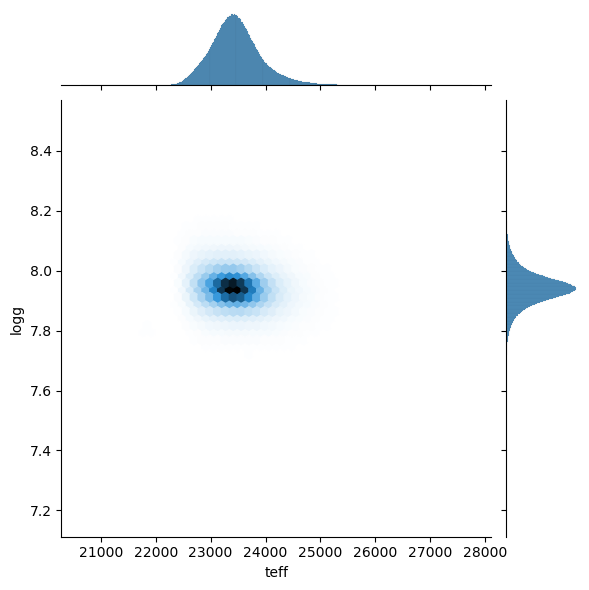

In [17]:
sns.jointplot(x='teff', y='logg', data=df, kind='hex')

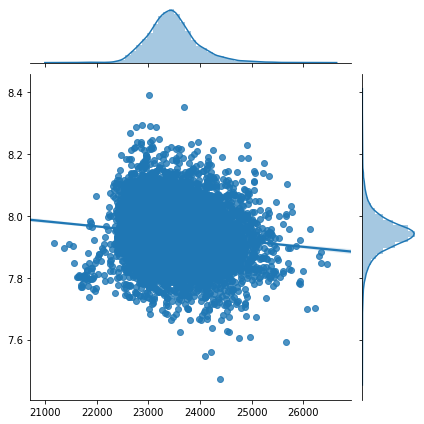

In [19]:
# Cool - we're not just getting a density plot, we're getting a 1D marginalization along both axes
# all with less work than matplotlib
# there's many ways to do things, but some ways are easier/apparently better than others

# we can also have seaborn just plot the vectors directly and do things like regression
sns.jointplot(x=x, y=y, kind='reg')

Hmm - the regression doesn't really look very good - there's some covariance between the two parameters but it's fairly weak - there's another way to get a sense of density. Look at this topographic map. Here' we're using contours to indicate density.

<img src="https://sitesmedia.s3.amazonaws.com/creekconnections/files/2014/09/topomap.jpg" width="600">

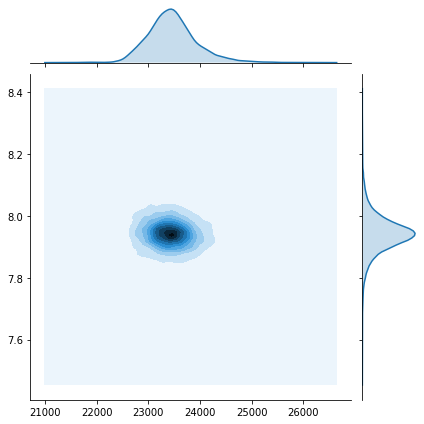

In [20]:
# seaborn can produce the same sort of output 
# using a technique called a kernel density estimate that we'll learn about soon

sns.jointplot(x=x, y=y, kind='kde')

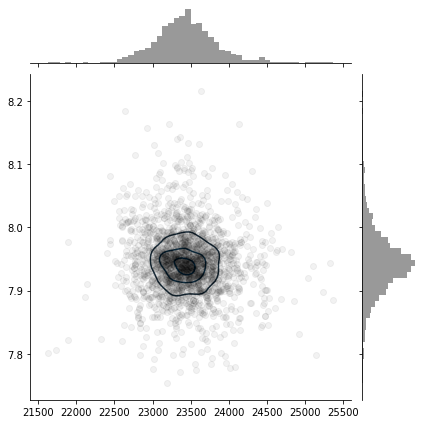

In [21]:
# you can even combine scatter plots and contours together with seaborn
sns.jointplot(x=x[::10], y=y[::10], color='k', alpha=0.05).plot_joint(sns.kdeplot, zorder=0, n_levels=3)

In [22]:
# Of course, we only dealt with bivariate data in class
# this was multivariate data
# if you want to visualize all of it, there's other dedicated tools
# this will let you make what is called a corner plot - a sequence of joint plots for visualizing multivariate data
import corner

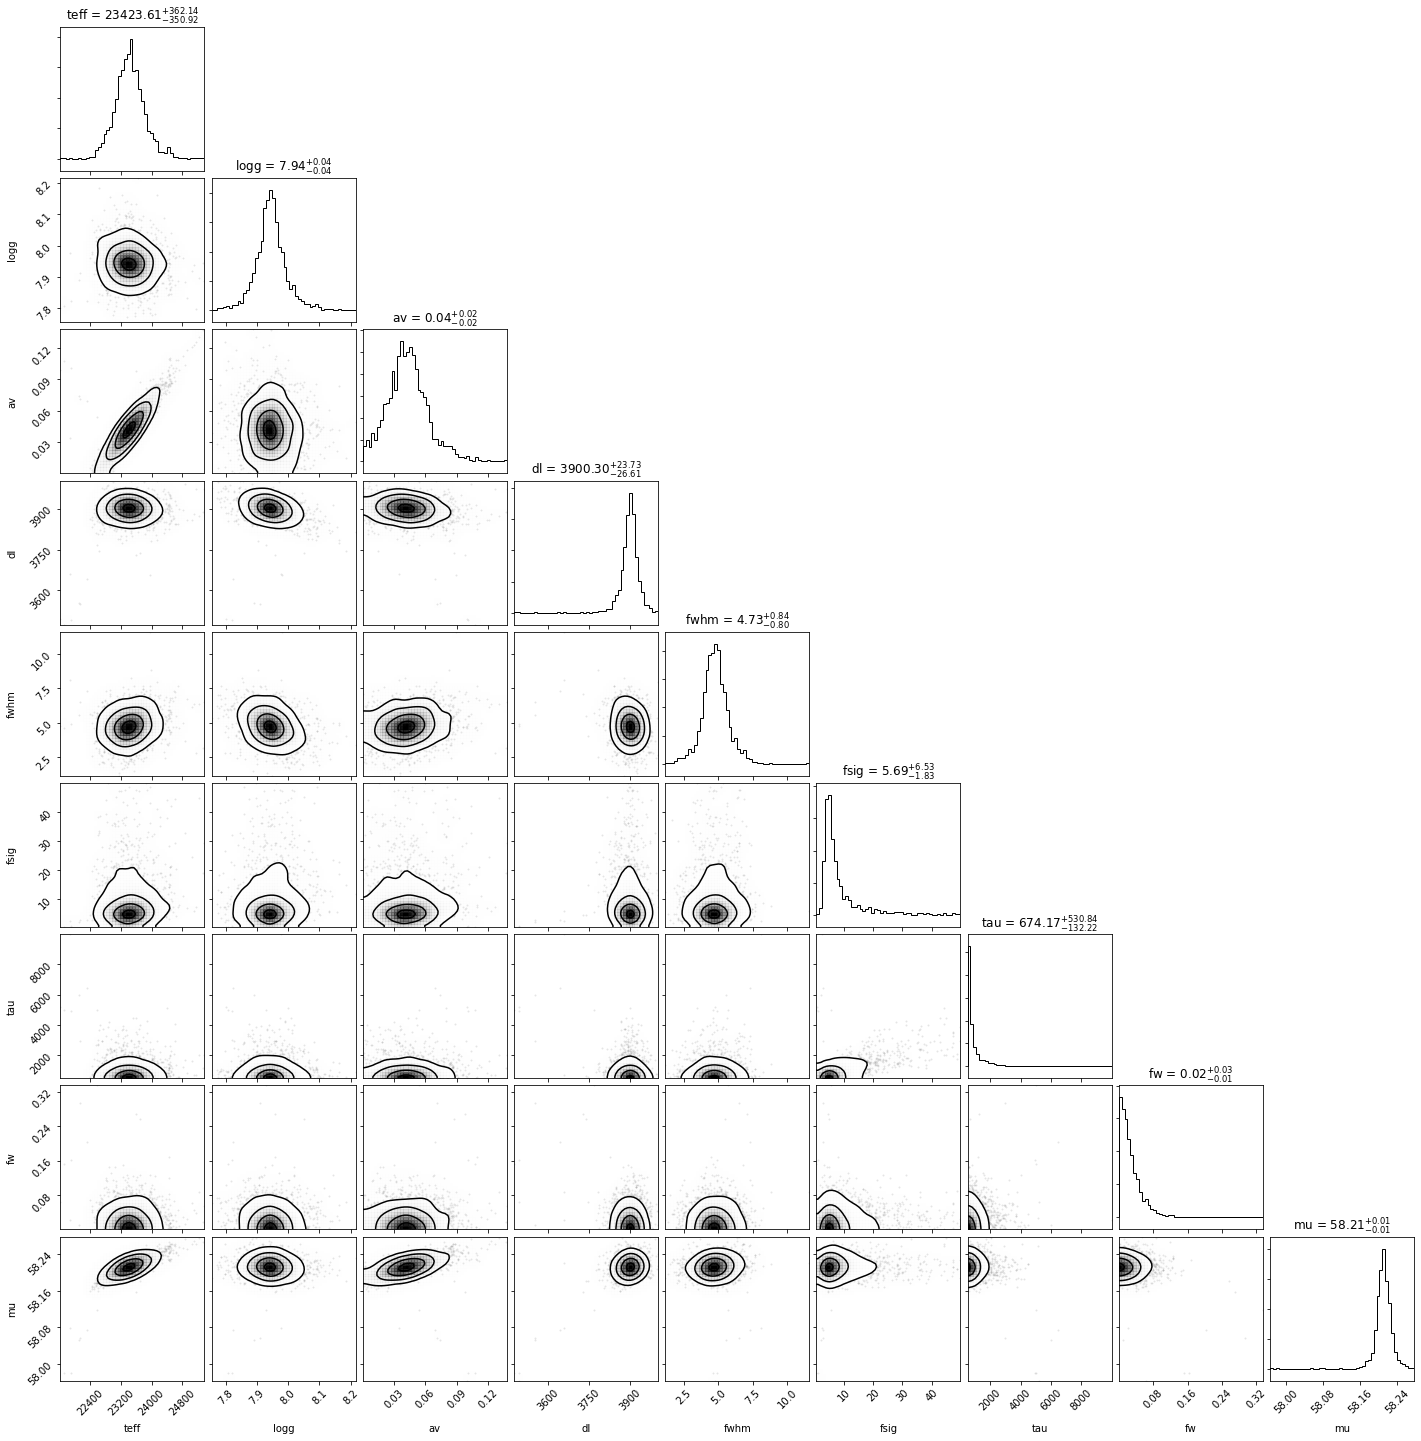

In [23]:
fig = corner.corner(pos[::1000,:], bins=50, color='k', smooth=2, labels=names, show_titles=True, scale_hist=True)
show(fig)

You are well armed to tackle visualizing any multivariate datasets this semester, and hopefully have a sense for marginalizations (the 1D histograms) as well. 

# MOMENTS AND DISTRIBUTIONS

## Example: Flat / Tophat distribution

<center> <img src ="./figures/tophat.png" width="800"> </center>

## Example: Gaussian / Normal distribution

<center> <img src ="./figures/normal.png" width="600"> </center>

## Example: Poisson distribution

<center> <img src ="./figures/poisson.png" width="600"> </center>

## Example: Skewness, asymmetry

<center> <img src ="./figures/skewness.png" width="600"> </center>

## So many distributions

<center> <img src ="./figures/distributions.png" width="400"> </center>

* Lawrence M Leemis & Jacquelyn T McQueston (2008) “Univariate Distribution Relationships”, The American Statistician, 62:1, 45-53, DOI: 10.1198/000313008X270448

## Quantile

<center> <img src ="./figures/quantile.png" width="800"> </center>

* So given a nice distribution function, you can calculate the mean, variance and moments ...
* ... but you don’t usually have a nice distribution function given to you.
* The distribution function is the thing you are trying to infer!
* P(H|D)
* The thing you have are the data - observations

# ESTIMATORS

## Data, samples

* Usually we have observations, e.g. additive process, i.e. y(i) = f(i) +  n(i), where f(i) is deterministic and n(i) is a random variable
* We want a characterisation of the deterministic and random parts
* Suppose something about the random variable, often normality
* We assume models and then estimate the parameters of a distribution, moments

## Quantile

<center> <img src ="./figures/qqplot.png" width="400"> </center>

# IN CLASS EXERCISE
* Now that you know how to generate points from a distribution, we can use the QQ plot to compare distributions to each other, or to a normal distribution
* Use scipy.stats to generate some random numbers from a normal, uniform, and Cauchy distribution
* Use statsmodels.api.qqplot to produce a qq plot of these distributions
* Now generate random numbers from two different normal distributions (different locations and variances) and concatenate them
* Again check the QQ plot

In [18]:
import h5py
import seaborn as sns
import pandas as pd

In [19]:
data = h5py.File('data/sdssj120650-20130310-total_mcmc.hdf5')
names = np.array(data['chain']['names'])
names = [x.decode('utf-8') for x in names]
pos = np.array(data['chain']['position'])
df = pd.DataFrame(pos[:,0:2], columns=[names[0],names[1]])

In [ ]:
### YOUR CODE HERE

sns.jointplot(...

In [5]:
# We can estimate these means and standard deviations by eye.
# we'll use these to construct a multivariate (well bivariate here) normal distribution
# That distribution will be our model of the data.

mu_x = 23500.
mu_y = 7.9
sigma_x = 500.
sigma_y = 0.1

The multivariate normal looks very much like the 1D normal distribution, but with scalar X replaced by a vector in N-D imensions and the covariance replaced by a NxN matrix. The off-diagonal elements of this matrix represent the correlation between the dimensions - which for now we're going to assume is 0. Wrong but useful.

In [6]:
from scipy.stats import multivariate_normal

In [7]:
# first we should define a grid of points and spacing along each axis 
# on which we evaluate the multivariate normal PDF

# we can just read those of the plot above or from part 2
# we construct the grid with the numpy "meshgrid function"
# remember the array indexing notation is start:stop:stepsize
x, y = np.mgrid[21000:27000:300, 7.5:8.4:0.05]

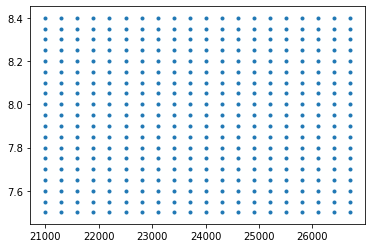

In [8]:
# we can visualize the grid easily
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x, y, marker='.')

In [9]:
# this is grid of points on which we will evaluate the PDF, but we also need to store the actual p(x, y) values
# we can do that by constructing an empty array and adding an axis to store the z = p(x, y) values

pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

In [10]:
# now we need to construct our mean vector and covariance matrix
# remember that the variance is the square of the standard deviations you estimated

mu = [mu_x, mu_y]
covmat = [[sigma_x**2., 0.], [0., sigma_y**2]]

In [11]:
# we now have to initalize a multivariate normal object for our specific values of mu and sigma
rv = multivariate_normal(mu, covmat)

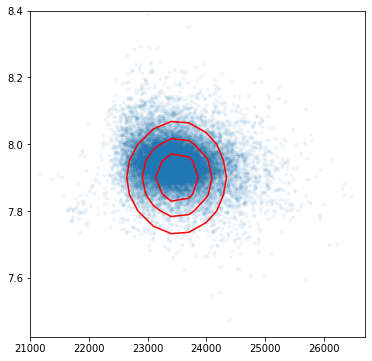

In [12]:
# ok, lets see if this model is a reasonable description of the data

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.scatter(df['teff'][::100], df['logg'][::100], marker='.', alpha=0.05)
ax.contour(x, y, rv.pdf(pos), levels=3, colors='r')

In [ ]:
# we can do better by using the mean and standard deviation estimated from the data
# this is called the method of moments

mu_x = np.mean(df['teff'][::100])
mu_y = np.mean(df['logg'][::100])
sigma_x = np.std(df['teff'][::100])
sigma_y = np.std(df['logg'][::100])

mu = [mu_x, mu_y]
covmat = [[sigma_x**2., 0.], [0., sigma_y**2]]
rv = multivariate_normal(mu, covmat)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()

### YOUR CODE HERE
ax.scatter(...
ax.contour(...

In [ ]:
# that's better! We can refine even further if we use the covariance from the data

mu_x = np.mean(df['teff'][::100])
mu_y = np.mean(df['logg'][::100])
covmat = df[::100].cov()

rv2 = multivariate_normal(mu, covmat)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()

### YOUR CODE HERE
ax.scatter(...
ax.contour(...
ax.contour(...

In [21]:
# now we've used this to model bivariate data, but the procedure is general
# you can use it for any N-D dataset
# in the case of bivariate data, this is a nice convenience function that gives you 

from astroML.stats import fit_bivariate_normal

In [16]:
fitted_mu, fit_sig_x, fit_sig_y, theta = fit_bivariate_normal(df['teff'][::100], df['logg'][::100])

In [ ]:
# compare what you get from the data:
print(mu, fitted_mu)

In [ ]:
print(sigma_x, fit_sig_x)
print(sigma_y, fit_sig_y)

The fitted mean, assuming a normal distribution and the sample mean are close, as are the fitted standard deviation and estimated standard deviation.

This is good but not unexpected because visibly the data looked reasonably consistent with a bivariate normal. This model was useful.

The converse is NOT true. 

If the moments of two distributions agree, that does not always mean that the distributions are in good agreement as we'll see in the next exercise.